In [1]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from text_utilities import *
import pandas as pd
from pathlib import Path
import nltk

In [2]:
train_df = generate_training_data()
train_df.head()

,text,author
0,﻿the project gutenberg ebook of eight cousins ...,Alcott-Lousia May
1,. it was an excellent place for woe ; and the ...,Alcott-Lousia May
2,"not good for her , and she grew pale , heavy-e...",Alcott-Lousia May
3,"enough , out of her slender throat came the sw...",Alcott-Lousia May
4,". have you a guardian ? ” “ my sakes , no ! i ...",Alcott-Lousia May


In [3]:
test_df = generate_testing_data()
test_df.head()

,text,author
0,"﻿the project gutenberg ebook of little women ,...",Alcott-Lousia May
1,and she thinks we ought not to spend money for...,Alcott-Lousia May
2,"labels , as if papa was a pickle bottle , '' a...",Alcott-Lousia May
3,go and fight with papa . and i can only stay h...,Alcott-Lousia May
4,"a flyaway look to her clothes , and the uncomf...",Alcott-Lousia May


                     precision    recall  f1-score   support

  Alcott-Lousia May       0.94      0.99      0.96       458
        Austen-Jane       0.91      0.98      0.94       289
 Doyle-Arthur Conan       0.63      0.34      0.44       365
Hawthorne-Nathaniel       0.81      0.97      0.88       207
        Kafka-Franz       1.00      0.92      0.96       205
    Melville-Herman       0.61      0.97      0.75       340
        Wilde-Oscar       0.12      0.04      0.06       138

           accuracy                           0.79      2002
          macro avg       0.72      0.74      0.71      2002
       weighted avg       0.76      0.79      0.76      2002



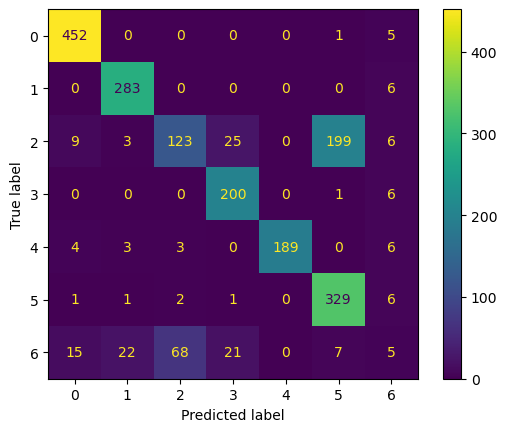

In [4]:
#MultinomialNB
# Step 1: Prepare the data
X_train = train_df['text']
y_train = train_df['author']
X_test = test_df['text']
y_test = test_df['author']


# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build and train the MultinomialNB classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred))
multinomial = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(multinomial).plot()

C:\Users\MUDIT BAID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUDIT BAID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUDIT BAID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

  Alcott-Lousia May       0.91      0.98      0.95       458
        Austen-Jane       0.85      0.98      0.91       289
 Doyle-Arthur Conan       0.52      0.25      0.34       365
Hawthorne-Nathaniel       0.88      0.94      0.91       207
        Kafka-Franz       1.00      0.92      0.96       205
    Melville-Herman       0.56      0.97      0.71       340
        Wilde-Oscar       0.00      0.00      0.00       138

           accuracy                           0.77      2002
          macro avg       0.68      0.72      0.68      2002
       weighted avg       0.72      0.77      0.72      2002



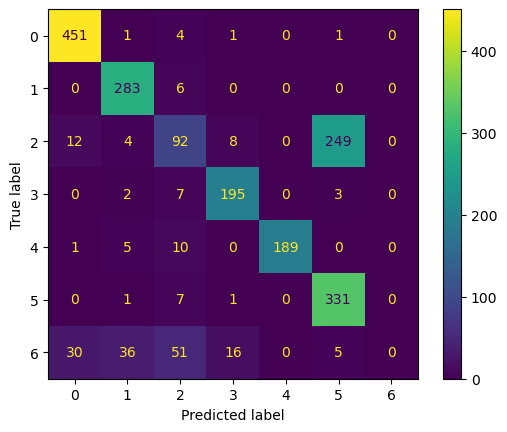

In [5]:
# BernoulliNB

X_train = train_df['text']
y_train = train_df['author']
X_test = test_df['text']
y_test = test_df['author']

#Vectorize the text data
vectorizer = CountVectorizer(binary=True)  # Use binary=True for BernoulliNB
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#Build and train the BernoulliNB classifier
classifier = BernoulliNB()
classifier.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred))
bernoulli_cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(bernoulli_cm).plot()

In [6]:
train_dfs = []
for file in train_files:
    df = process_file(file,post_process=True)
    train_dfs.append(df)
train_df_cleaned = pd.concat(train_dfs)
train_df_cleaned.tail()

,text,author
53,may_MD only_RB used_VBD associated_VBN any_DT ...,Wilde-Oscar
54,copy_NN give_VB away_RB reuse_NN under_IN term...,Wilde-Oscar
55,you_PRP comply_VBP paragraph_JJ e_NN e_NN e_IN...,Wilde-Oscar
56,damages_NNS except_IN right_JJ replacement_NN ...,Wilde-Oscar
57,following_VBG which_WDT you_PRP do_VBP cause_V...,Wilde-Oscar


In [7]:
test_dfs = []
for file in test_files:
    df = process_file(file,post_process=True)
    test_dfs.append(df)
test_df_cleaned = pd.concat(test_dfs) 
test_df_cleaned.head()

,text,author
0,﻿the_NN project_NN gutenberg_VBZ ebook_VB litt...,Alcott-Lousia May
1,she_PRP thinks_VBZ we_PRP ought_MD not_RB spen...,Alcott-Lousia May
2,labels_NNS papa_NN was_VBD pickle_JJ bottle_NN...,Alcott-Lousia May
3,go_VB fight_JJ papa_NN i_NN can_MD only_RB sta...,Alcott-Lousia May
4,flyaway_RB look_VB her_PRP$ clothes_NNS uncomf...,Alcott-Lousia May


                     precision    recall  f1-score   support

  Alcott-Lousia May       0.91      0.98      0.95       458
        Austen-Jane       0.90      0.98      0.94       289
 Doyle-Arthur Conan       0.63      0.45      0.53       365
Hawthorne-Nathaniel       0.90      0.92      0.91       207
        Kafka-Franz       1.00      0.81      0.89       205
    Melville-Herman       0.63      0.95      0.76       340
        Wilde-Oscar       0.13      0.04      0.06       138

           accuracy                           0.79      2002
          macro avg       0.73      0.73      0.72      2002
       weighted avg       0.76      0.79      0.77      2002

Confusion Matrix


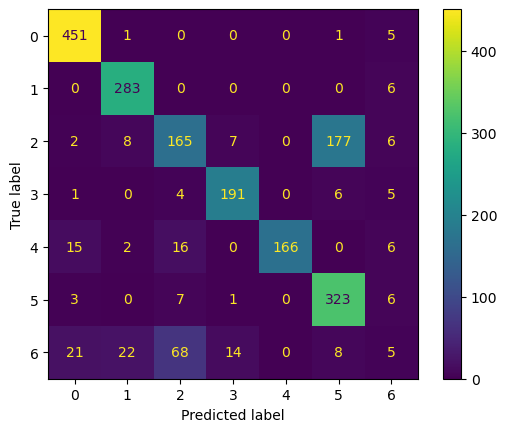

In [8]:
# MultinomialNB on pre-processed data. Performed Re-sampling th training set, stopwords removal and POS Tagging
# Step 1: Prepare the data
X_train = train_df_cleaned['text']
y_train = train_df_cleaned['author']
X_test = test_df_cleaned['text']
y_test = test_df_cleaned['author']

#Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#Build and train the MultinomialNB classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

#Evaluate the model
y_pred = classifier.predict(X_test_vectorized)

# Print classification report
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
multinomial_cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(multinomial_cm).plot()

#### The Classifier degraded after lemmatization and stemming. So I removed them. Resampled the training set to contain 2 books of each author to balance classes. Added Parts of Speech tags to tokens and removed stopwords. Removing all stopwords provided by nltk didn't seem to do well so I manually removed only 20 stopwords from the set. 